We would first import some packages

In [1]:
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from collections import namedtuple
from matplotlib.lines import Line2D

Now we will read data which was downloaded from the [Maddison Historical Statistics](https://www.rug.nl/ggdc/historicaldevelopment/maddison/releases/maddison-project-database-2020) webpage

We will read this data into a pandas dataframe

In [2]:
data = pd.read_excel("mpd2020.xlsx", sheet_name="Full data")
data.head()

,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1820,NaN,3280.0
1,AFG,Afghanistan,1870,NaN,4207.0
2,AFG,Afghanistan,1913,NaN,5730.0
3,AFG,Afghanistan,1950,1156.0,8150.0
4,AFG,Afghanistan,1951,1170.0,8284.0


We will clean and process the data using some of the code from [quantecon website](https://intro.quantecon.org/long_run_growth.html)

In [3]:
#creating a mapping between country codes and country names in this dataset
code_to_name = data[['countrycode','country']].drop_duplicates().reset_index(drop=True).set_index(['countrycode'])

gdppc = data.set_index(['countrycode','year'])['gdppc']
gdppc = gdppc.unstack('countrycode')

In the following section we are going to plot the GDP per capita for undivided India during British coloinial rule. We are starting from 1858(year of passage of the Government of India Act) till 1947(year of Independence of India). 

The x axis will consist of year and the y-axis will be in International dollars- a hypothetical unit of currency that has the same purchasing power parity that the US Dollar has in the United States at any given point in time

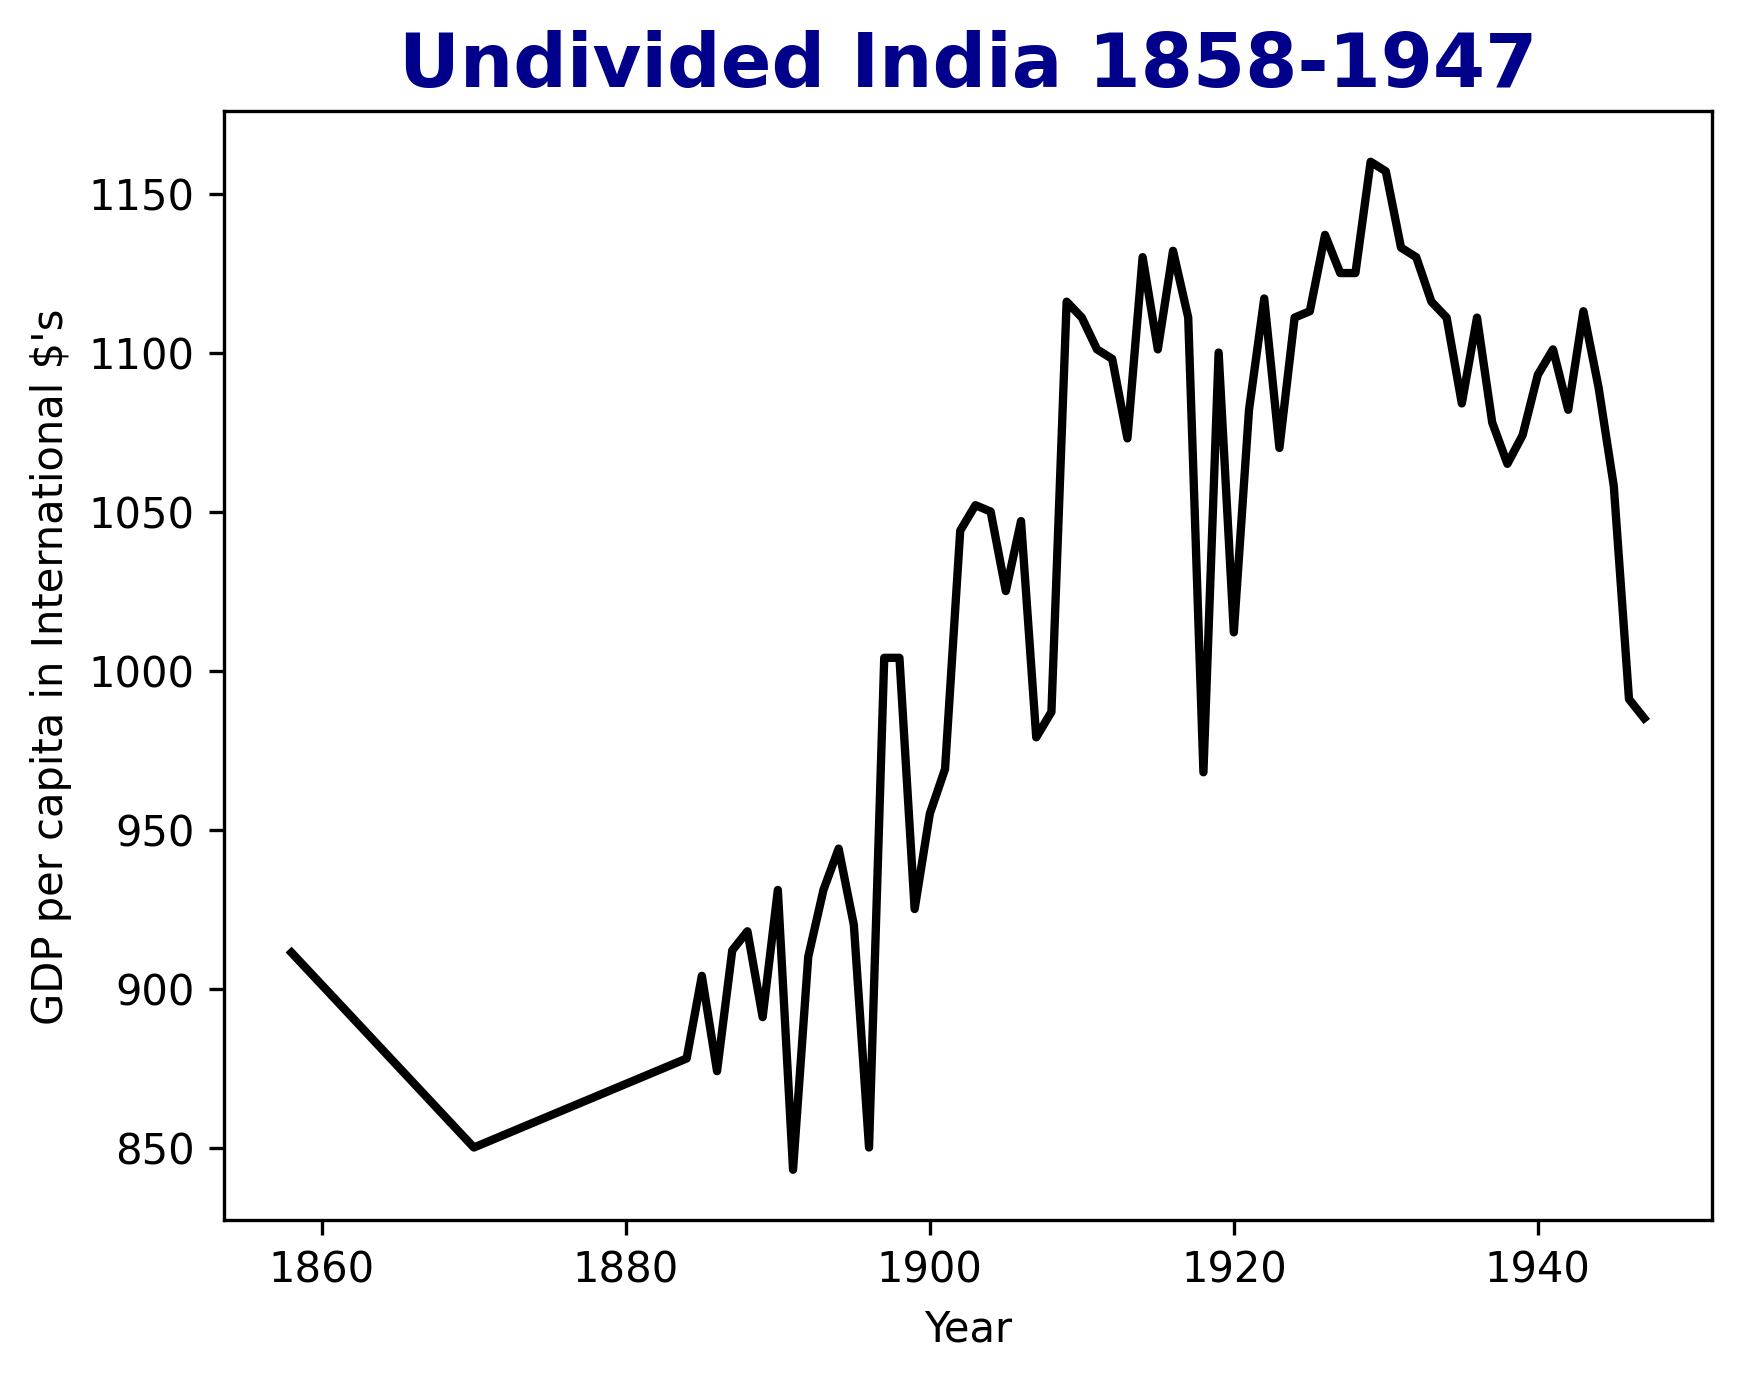

In [4]:
fig, ax = plt.subplots(dpi=300)

ax.plot(gdppc['IND'].interpolate().loc[1858:1947],
        linestyle='-',
        lw=2,
        color='black')

ax.set_ylabel('GDP per capita in International $\'s')
ax.set_xlabel('Year')

plt.title("Undivided India 1858-1947", fontweight='bold', fontsize=18, color="darkblue")
plt.show()

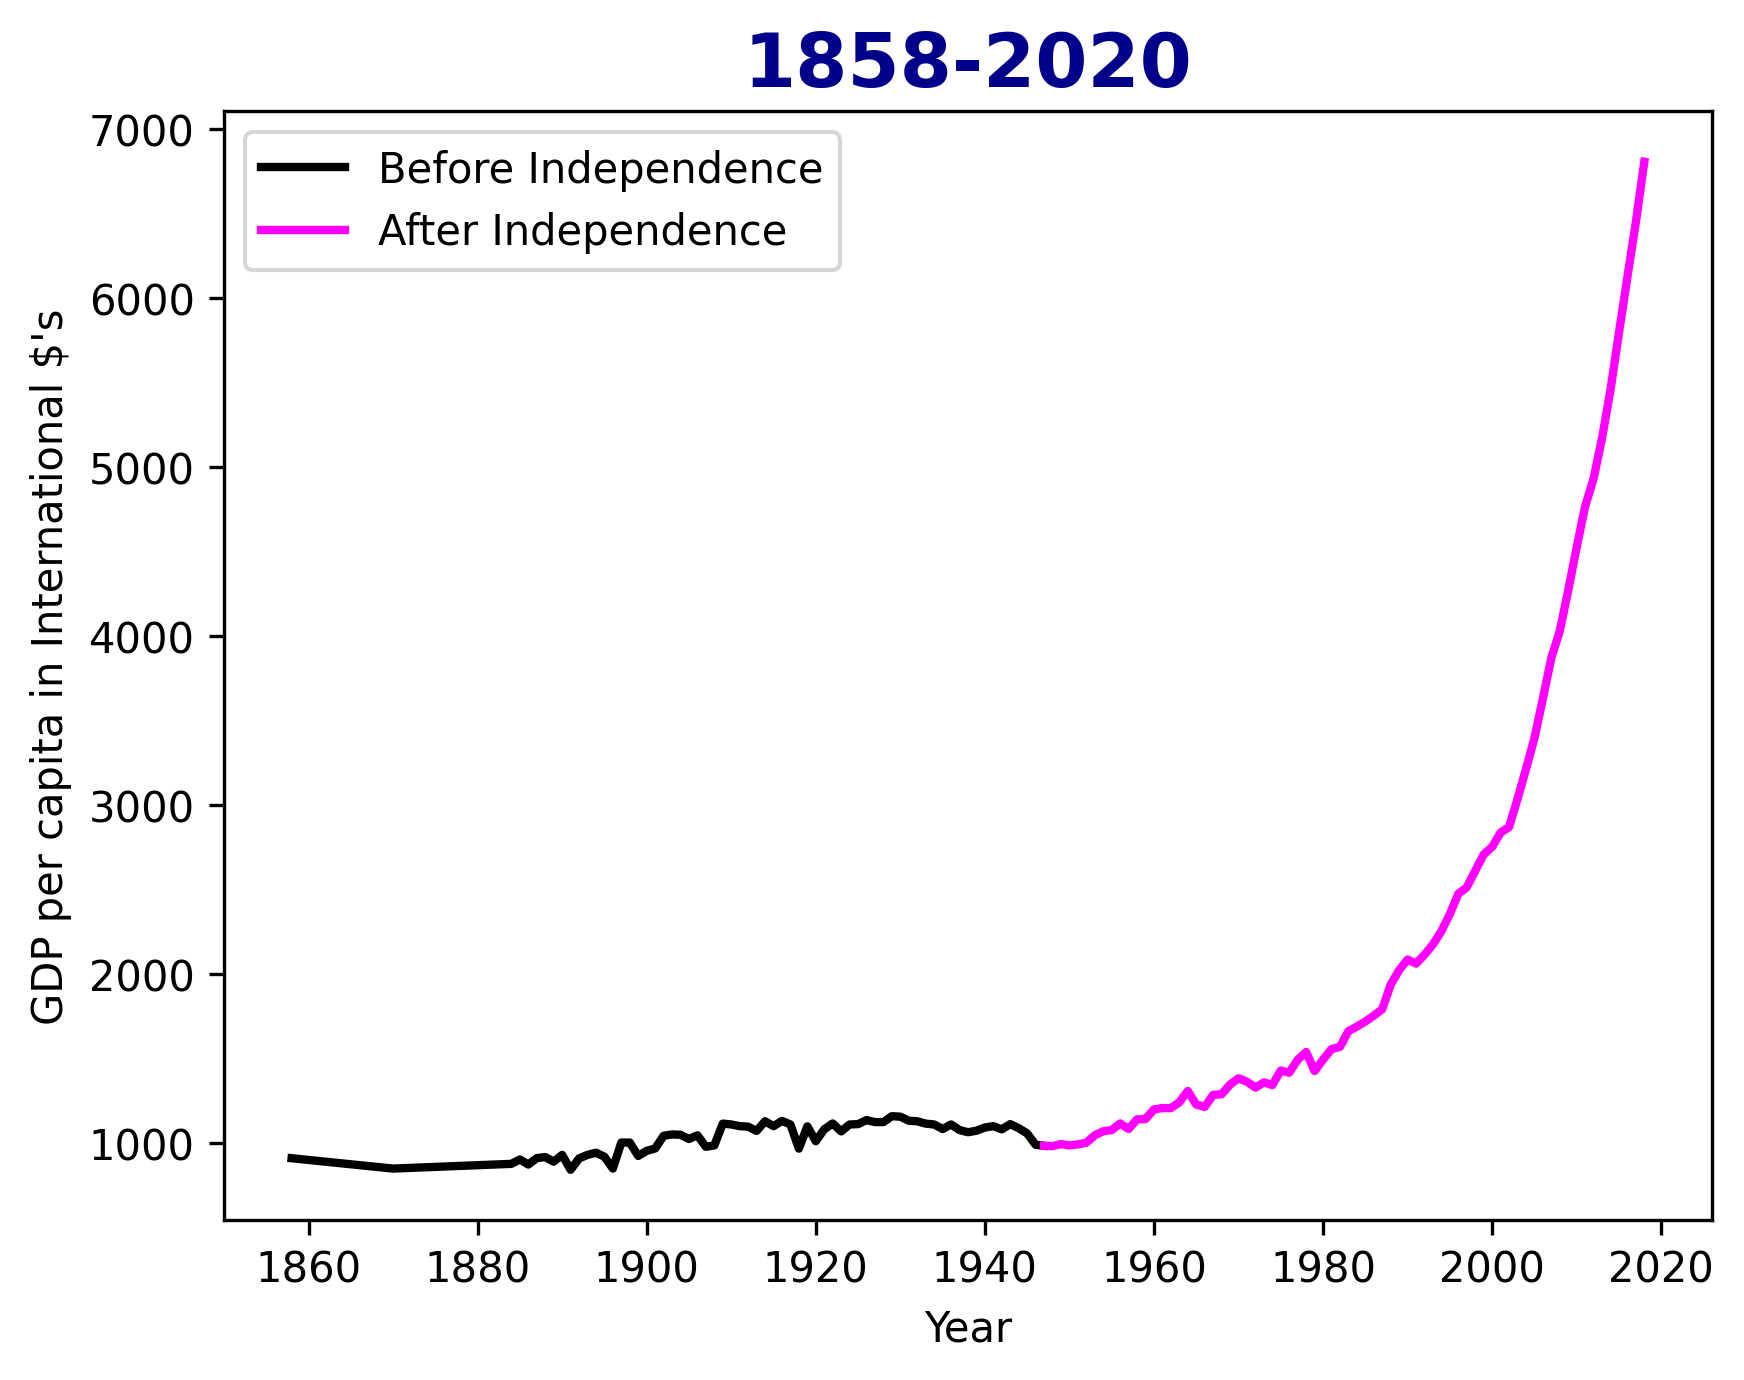

In [5]:
fig, ax = plt.subplots(dpi=300)

ax.plot(gdppc['IND'].interpolate().loc[1858:1947],
        linestyle='-',
        lw=2,
        color='black')

ax.plot(gdppc['IND'].interpolate().loc[1947:2020],
        linestyle='-',
        lw=2,
        color='magenta')

ax.set_ylabel('GDP per capita in International $\'s')
ax.set_xlabel('Year')

plt.title("1858-2020", fontweight='bold', fontsize=18, color="darkblue")
plt.legend(('Before Independence', 'After Independence'))
plt.show()

As we can see growth of Economy of India as measured by GDP per capita before and after Independence offer stark variations.

The new nation after Independence had a lot of challenges initially but slowly it began to realize its potential and grew at a much faster rate than under British colonial rule

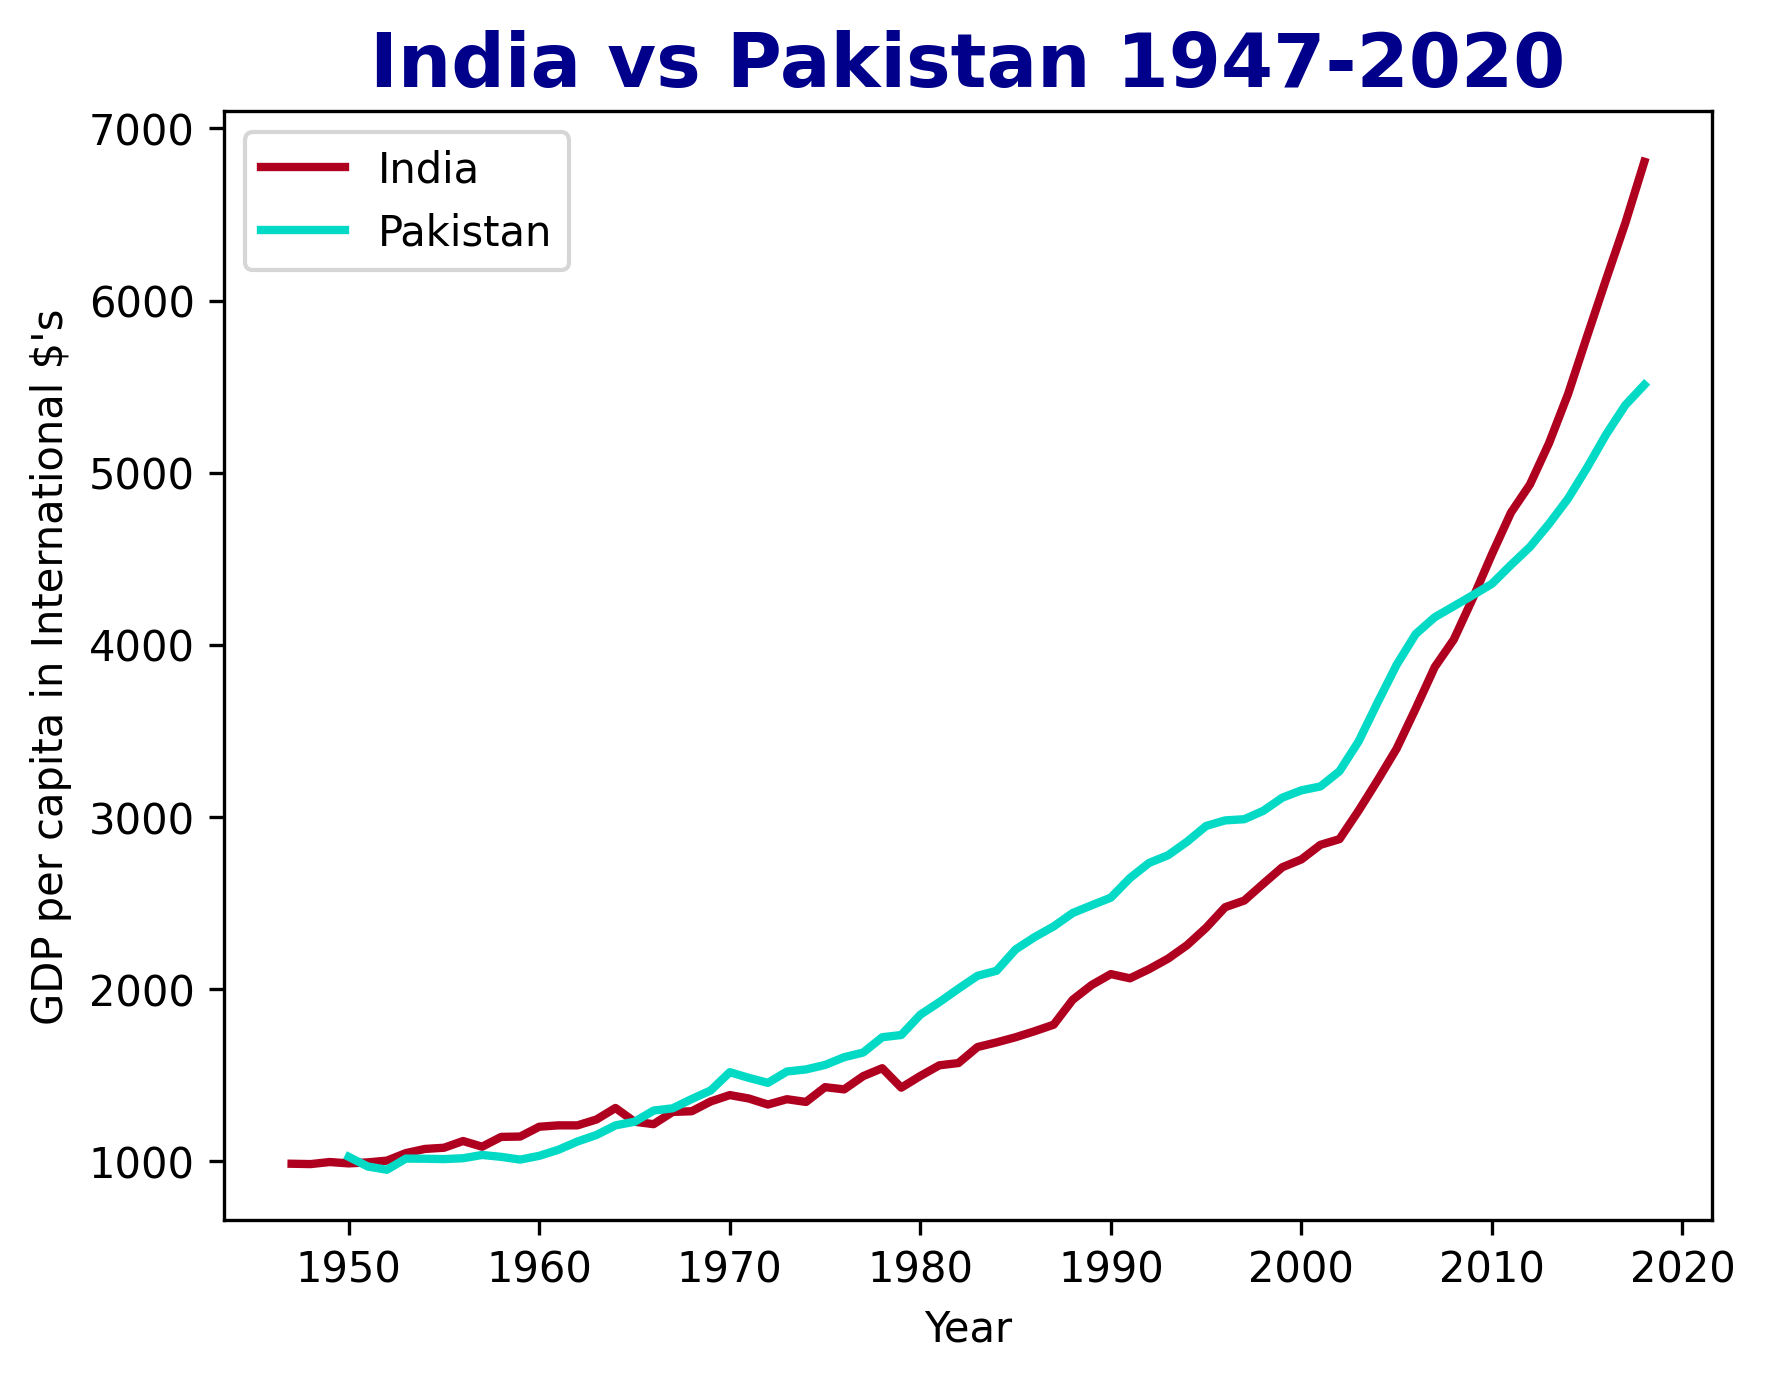

In [6]:
fig, ax = plt.subplots(dpi=300)

ax.plot(gdppc['IND'].interpolate().loc[1947:2020],
        linestyle='-',
        lw=2,
        color='#B00020')

ax.plot(gdppc['PAK'].interpolate().loc[1947:2020],
        linestyle='-',
        lw=2,
        color='#03DAC5')

ax.set_ylabel('GDP per capita in International $\'s')
ax.set_xlabel('Year')

plt.title("India vs Pakistan 1947-2020",fontweight='bold', fontsize=18, color="darkblue")
plt.legend(('India', 'Pakistan'))
plt.show()

India and Pakistan got independence at almost the same time from British Colonial rule. We see Pakistan overtook India from about mid-1960s and had a better GDP per capita till about the late 2000's. 

After the late 2000's India took over Pakistan in GDP per capita and the gap widened further.

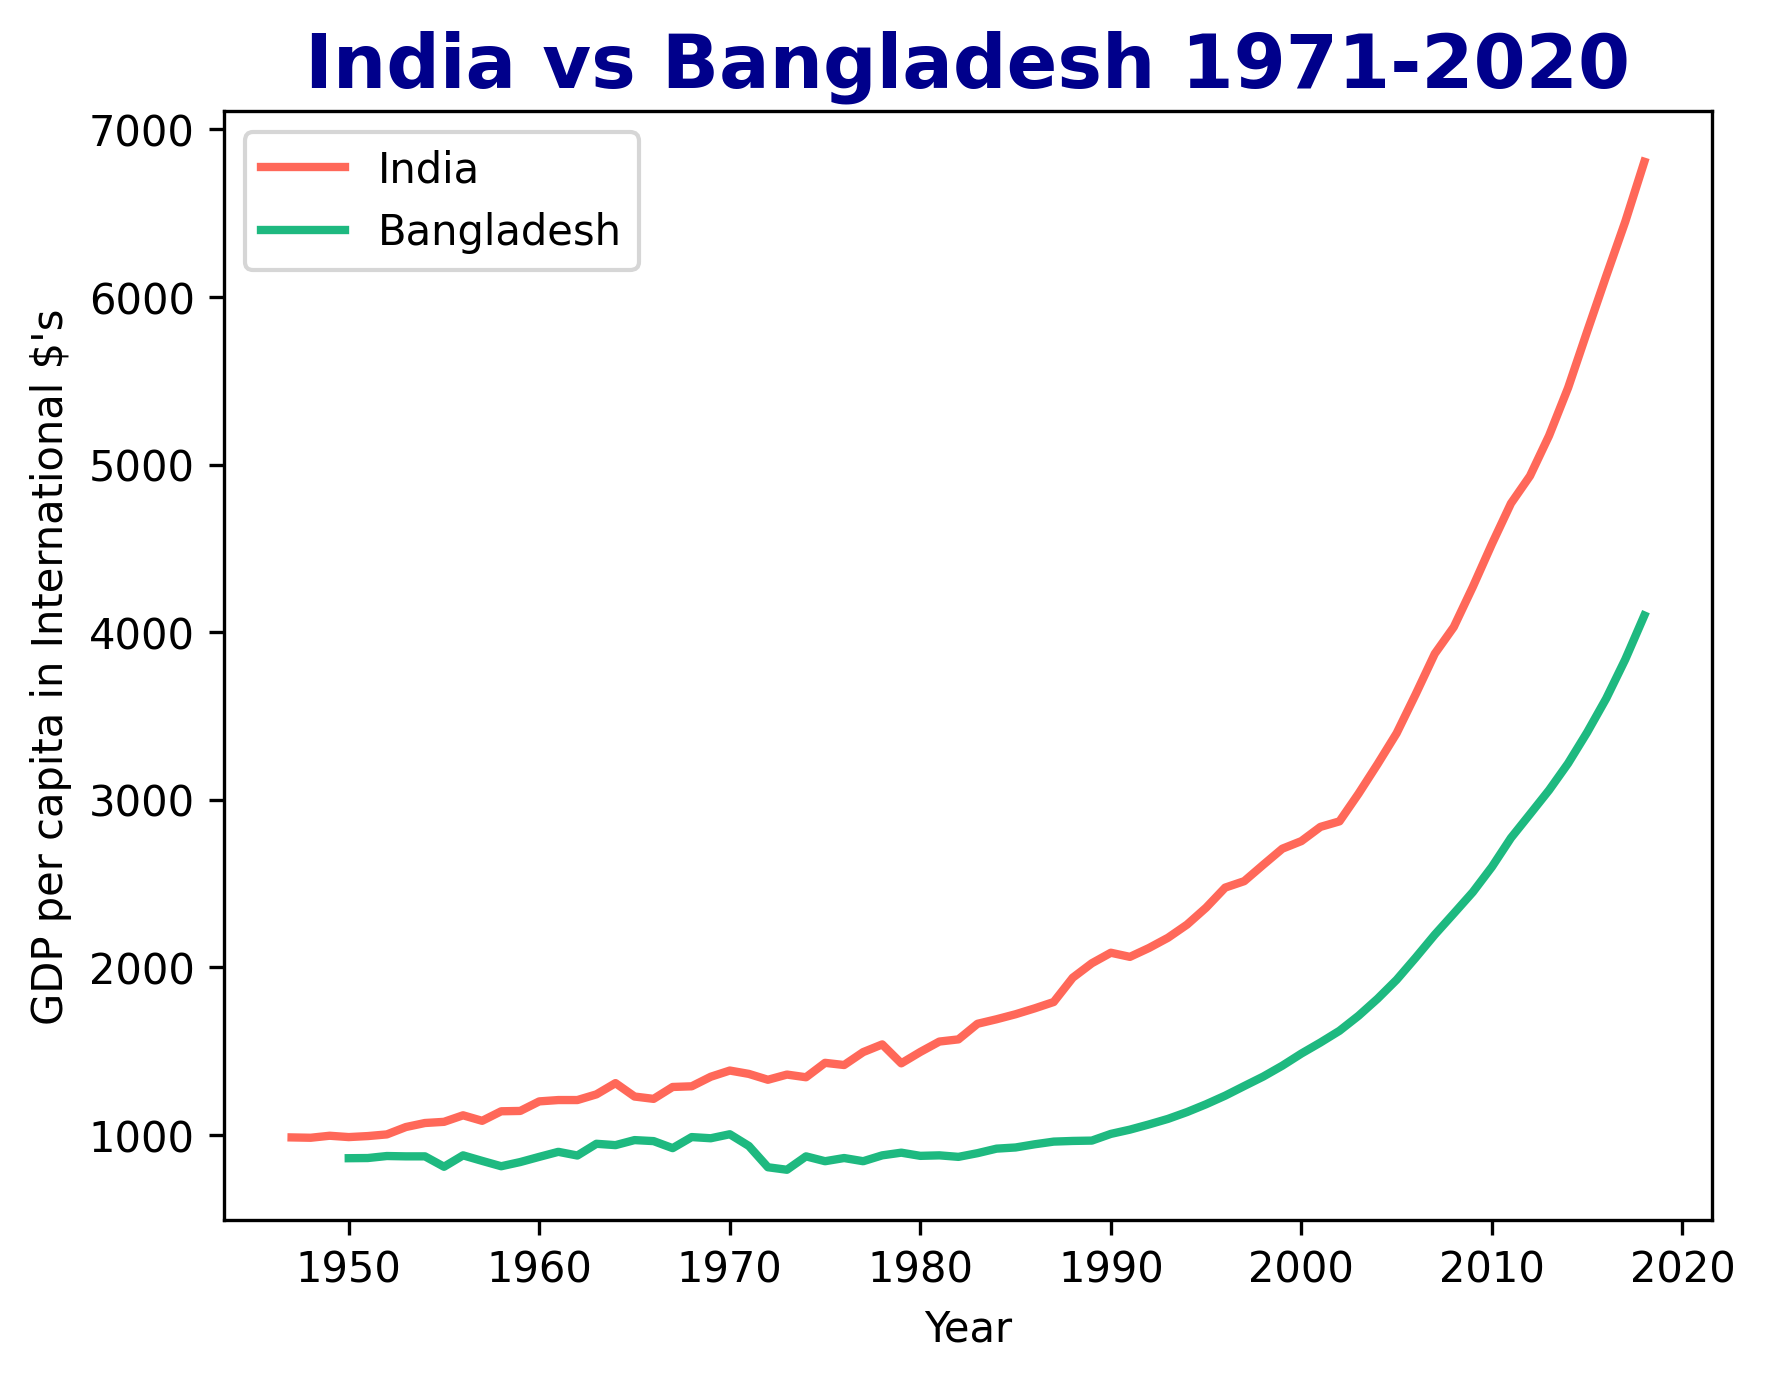

In [7]:
fig, ax = plt.subplots(dpi=300)

ax.plot(gdppc['IND'].interpolate().loc[1947:2020],
        linestyle='-',
        lw=2,
        color='#FF6859')

ax.plot(gdppc['BGD'].interpolate().loc[1947:2020],
        linestyle='-',
        lw=2,
        color='#1EB980')

ax.set_ylabel('GDP per capita in International $\'s')
ax.set_xlabel('Year')

plt.title("India vs Bangladesh 1971-2020", fontweight='bold', fontsize=18, color="darkblue")
plt.legend(('India', 'Bangladesh'))
plt.show()

Bangladesh became a country in 1971. If we compare the GDP per capita growth of India and Bangladesh initially Bangladesh's growth stayed stagnant till about the mid 1980's. Starting from the 1990's Bangladesh economic growth as measured in terms of GDP per capita closely mimicks that of India. 

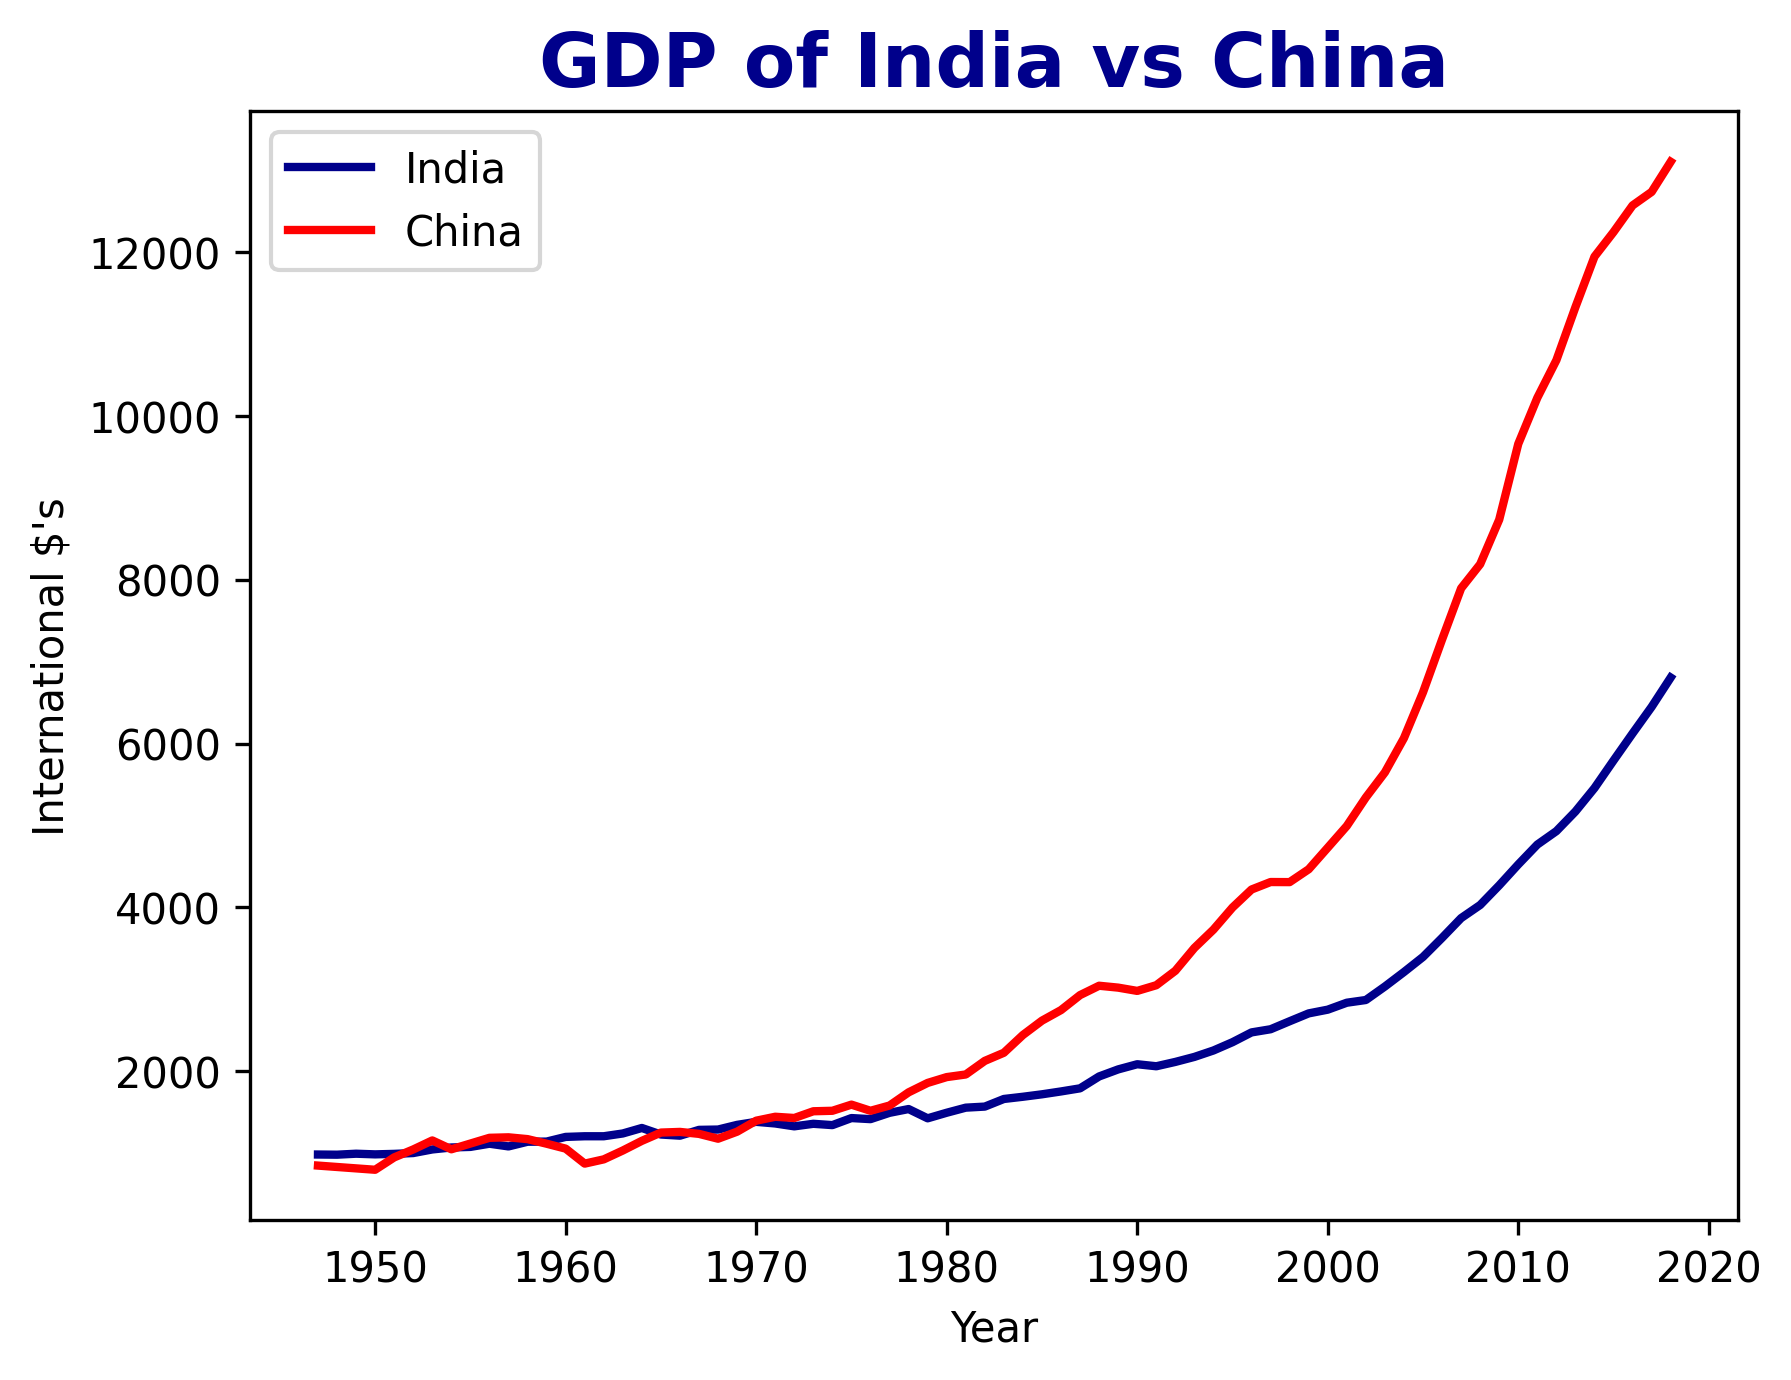

In [8]:
#Let's plot the GDP growth of India vs China
fig, ax = plt.subplots(dpi=300)

ax.plot(gdppc['IND'].interpolate().loc[1947:2020],
        linestyle='-',
        lw=2,
        color='darkblue')

ax.plot(gdppc['CHN'].interpolate().loc[1947:2020],
        linestyle='-',
        lw=2,
        color='red')

font1 = {'family':'sans-serif','color':'black','size':20}
ax.set_ylabel('International $\'s')
ax.set_xlabel('Year')

plt.title("GDP of India vs China", fontweight='bold', fontsize=18, color="darkblue")
plt.legend(('India', 'China'))
plt.show()

We observe that till about the end of the 1970's India and China's GDP growth trajectory had been similar but China overtook India after that. This can be attributed to the *Open Door Policy* under Deng Xiaoping in China from December 1978 whereby China opened up its economy to the world.